# Assignment 1

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
# The following line is needed to show plots inline in notebooks
%matplotlib inline 

In [64]:
data = pd.read_csv('Kaggle_Salary.csv')
# drop row index 0 because it holds the Questions (inplace is to remove permanently)
data.drop(data.index[0], inplace=True)

## 1. Data Cleaning

#### Functions

In [59]:
# Function to calculate how many missing values are in a column
def how_many_nan(col_name):
    amount = col_name[col_name.isna()].shape[0]
    return amount

### Label Salary

In [11]:
# Label salary
def encode_salary(salary):
    if "0-10,000" in salary:
        return 1
    if "10-20,000" in salary:
        return 2
    if "20-30,000" in salary:
        return 3
    if "30-40,000" in salary:
        return 4
    if "40-50,000" in salary:
        return 5
    if "50-60,000" in salary:
        return 6
    if "60-70,000" in salary:
        return 7
    if "70-80,000" in salary:
        return 8
    if "80-90,000" in salary:
        return 9
    if "90-100,000" in salary:
        return 10
    if "100-125,000" in salary:
        return 11
    if "125-150,000" in salary:
        return 12
    if "150-200,000" in salary:
        return 13
    if "200-250,000" in salary:
        return 14
    if "250-300,000" in salary:
        return 15
    if "300-400,000" in salary:
        return 16
    if "400-500,000" in salary:
        return 17
    if "500,000+" in salary:
        return 18
# Create a new column with the encoded salary
data["Salary_label"]=data["Q9"].apply(encode_salary)

#### Q0: Completion Time

In [12]:
# Correlation between completion time and number of unaswered questions?

#### Q1: Gender

In [13]:
# Combine gender cateogires less than 150 with Other
gender_count = data.Q1.value_counts()
value_mask = data.Q1.isin(gender_count.index[gender_count < 150]) 
data.loc[value_mask,'Q1'] = "Other"

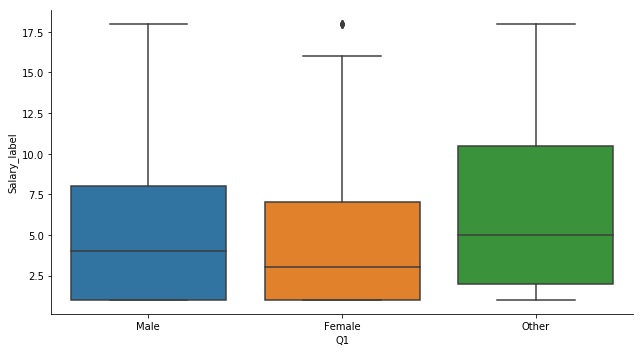

In [14]:
sns.catplot(x='Q1', y='Salary_label', data=data, kind="box").fig.set_size_inches(10,5)

#### Q2: Age

In [15]:
age_count = data.Q2.value_counts()
value_mask = data.Q2.isin(age_count.index[age_count < 180]) 
data.loc[value_mask,'Q2'] = "70+"

#### Q3: Countries

In [16]:
# Categorize any country less than a threshold count in to other
countries_count = data.Q3.value_counts()
value_mask = data.Q3.isin(countries_count.index[countries_count < 100]) 
data.loc[value_mask,'Q3'] = "Other"

# Simplify Name
data['Q3'] = data['Q3'].replace('United States of America', 'USA')
data['Q3'] = data['Q3'].replace('United Kingdom of Great Britain and Northern Ireland', 'UKGBNI')
data['Q3'] = data['Q3'].replace('I do not wish to disclose my location', 'Other')
# data.Q3.value_counts()

#### Q4: Highest Level of Education

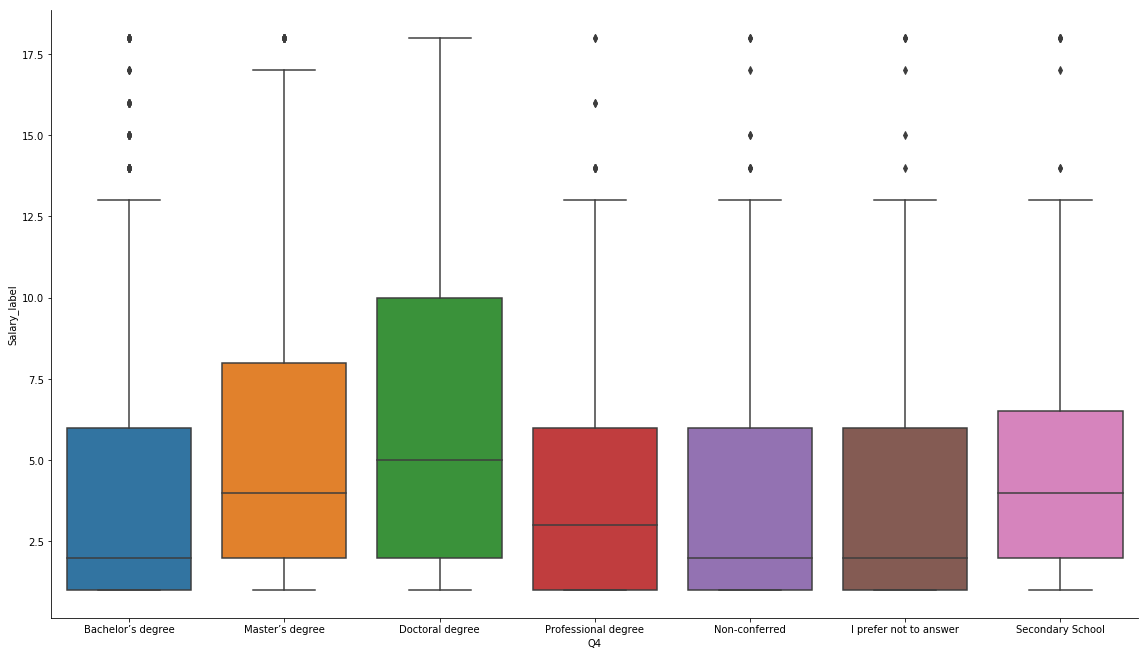

In [18]:
degree_count = data.Q4.value_counts(normalize=True)
# Simplify category name
data['Q4'] = data['Q4'].replace('Some college/university study without earning a bachelor’s degree', 'Non-conferred')
data['Q4'] = data['Q4'].replace('No formal education past high school', 'Secondary School')
sns.catplot(x='Q4', y='Salary_label', data=data, kind="box").fig.set_size_inches(20,10)

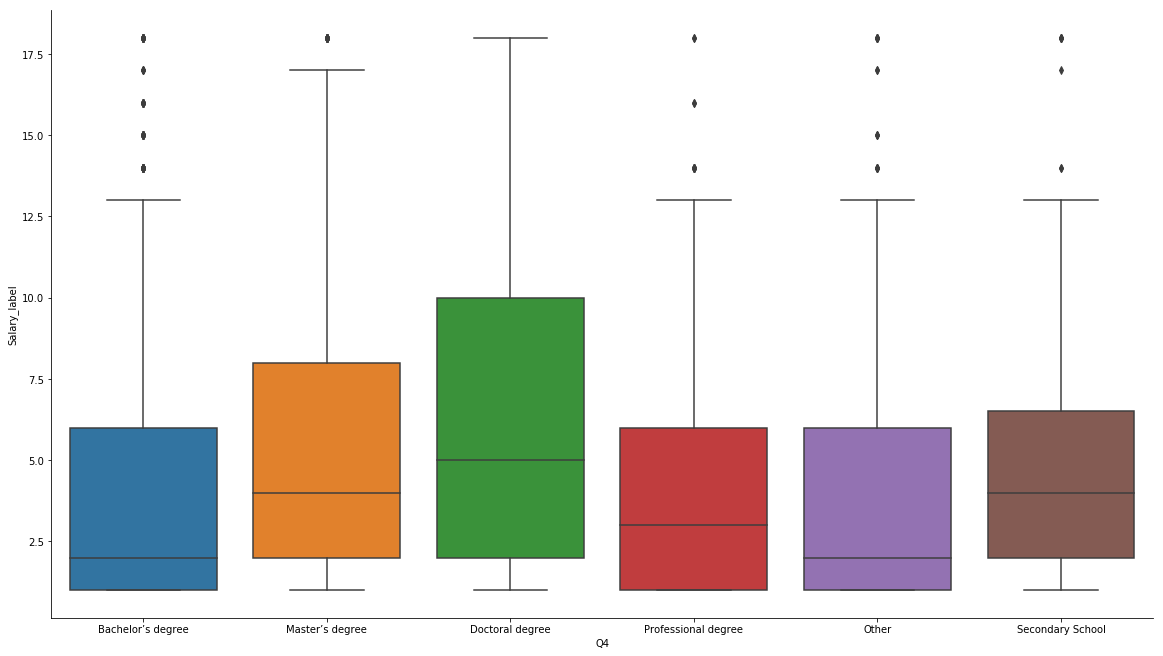

In [19]:
# Since "Non-conferred" and "I prefer not to answer" show similar salary earnings, I can combine them
data['Q4'] = data['Q4'].replace('Non-conferred', 'Other')
data['Q4'] = data['Q4'].replace('I prefer not to answer', 'Other')
sns.catplot(x='Q4', y='Salary_label', data=data, kind="box").fig.set_size_inches(20,10)

##### Q5: Major in University/College

In [20]:
# There is 135 missing values
a = data[data['Q5'].isna()]
how_many_nan(data['Q5'])

135

In [21]:
# All missing values belong to those who only completed Secondary School
a.Q4.value_counts(normalize=True)
# Fill Nan values in Major with Secondary School
data['Q5'] = data['Q5'].fillna('Secondary School')

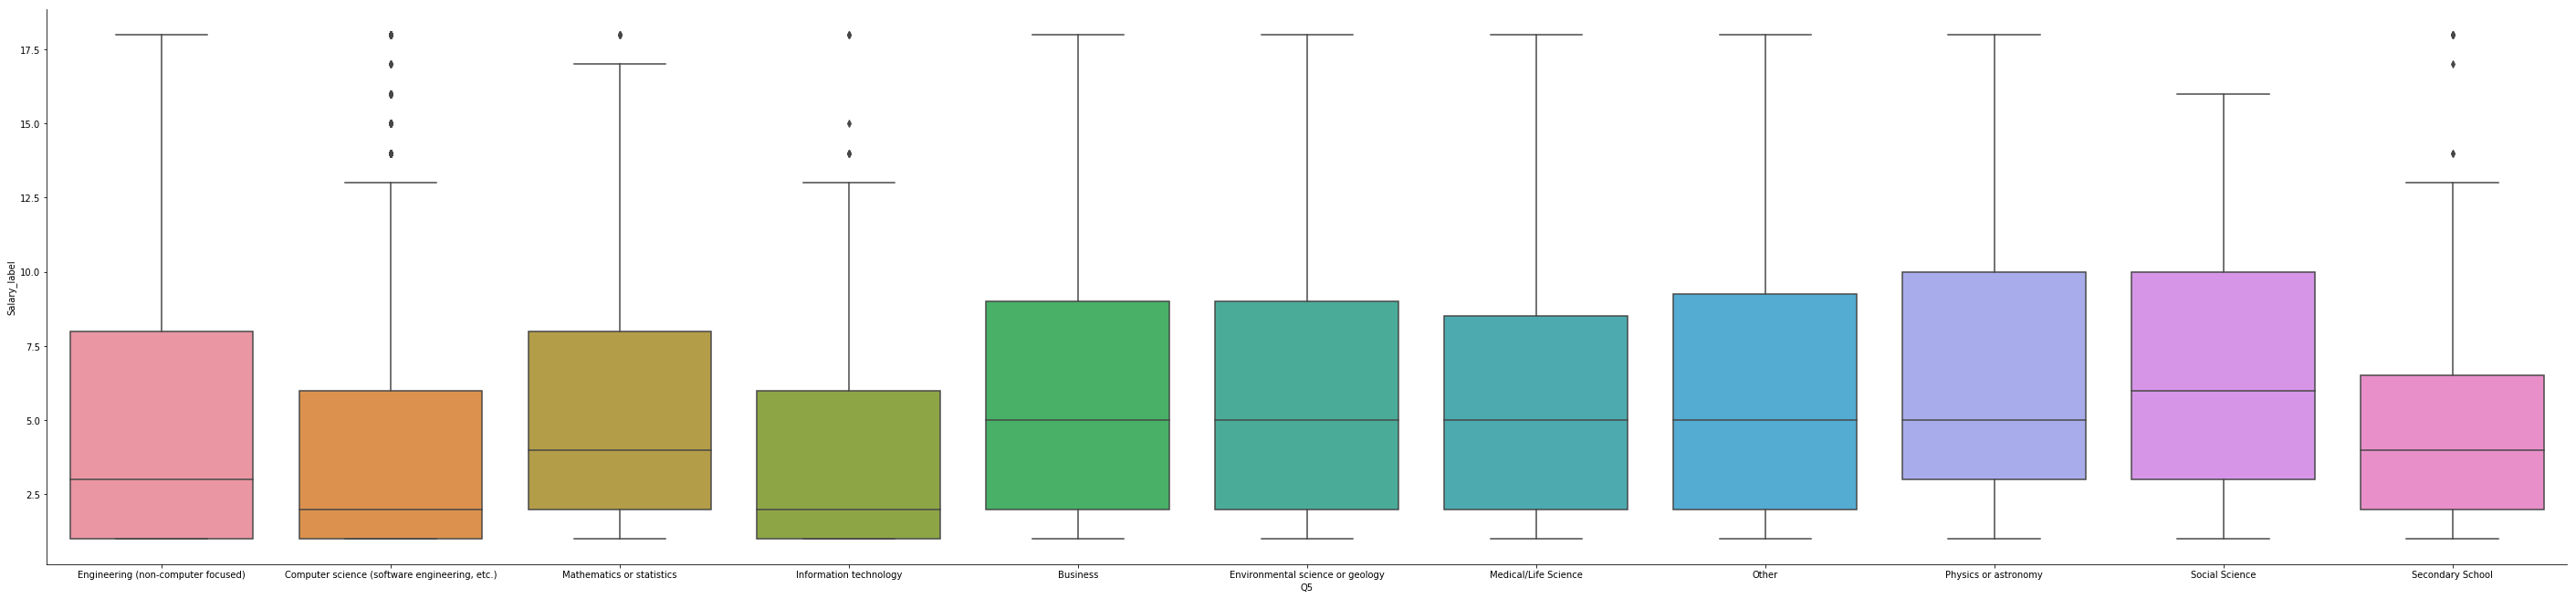

In [22]:
# Simplified naming
data['Q5'] = data['Q5'].replace('A business discipline (accounting, economics, finance, etc.)', 'Business')
data['Q5'] = data['Q5'].replace('Information technology, networking, or system administration', 'Information technology')
data['Q5'] = data['Q5'].replace('Medical or life sciences (biology, chemistry, medicine, etc.)', 'Medical/Life Science')
data['Q5'] = data['Q5'].replace('Social sciences (anthropology, psychology, sociology, etc.)', 'Social Science')
data['Q5'] = data['Q5'].replace('Humanities (history, literature, philosophy, etc.)', 'Humanities')
# Grouped together non-STEM with others
data['Q5'] = data['Q5'].replace('I never declared a major', 'Other')
data['Q5'] = data['Q5'].replace('Fine arts or performing arts', 'Other')
data['Q5'] = data['Q5'].replace('Humanities', 'Other')
sns.catplot(x='Q5', y='Salary_label', data=data, kind="box").fig.set_size_inches(60,10)

##### Q6: Position Title

In [23]:
# Eliminate position titles less than a threshold
title_count = data.Q6.value_counts()
value_mask = data.Q6.isin(title_count.index[title_count < 100]) 
data.loc[value_mask,'Q6'] = "Other"

##### Q7: Industry

In [24]:
industry_count = data.Q7.value_counts(normalize=True)
industry_count

Computers/Technology                      0.270854
I am a student                            0.145700
Academics/Education                       0.128395
Accounting/Finance                        0.076544
Other                                     0.048610
Online Service/Internet-based Services    0.046341
Medical/Pharmaceutical                    0.038369
Government/Public Service                 0.033962
Insurance/Risk Assessment                 0.029425
Manufacturing/Fabrication                 0.028194
Marketing/CRM                             0.025018
Retail/Sales                              0.023073
Energy/Mining                             0.022360
Broadcasting/Communications               0.020675
Online Business/Internet-based Sales      0.017629
Shipping/Transportation                   0.015361
Non-profit/Service                        0.009916
Hospitality/Entertainment/Sports          0.009852
Military/Security/Defense                 0.009722
Name: Q7, dtype: float64

##### Q8: Years of Experience 

In [25]:
# There's 76 missing values - Should just remove it
how_many_nan(data['Q8'])

76

In [26]:
# Recategorize YOE
data['Q8'] = data['Q8'].replace('0-1', '0-3') # 0-3 years
data['Q8'] = data['Q8'].replace('1-2', '0-3')
data['Q8'] = data['Q8'].replace('2-3', '0-3')
data['Q8'] = data['Q8'].replace('3-4', '3-5') # 3-5 years
data['Q8'] = data['Q8'].replace('4-5', '3-5')
data['Q8'] = data['Q8'].replace('20-25', '20-30') # 20-30 years
data['Q8'] = data['Q8'].replace('25-30', '20-30')
data.Q8.value_counts(normalize=True)

0-3      0.564710
3-5      0.159773
5-10     0.128509
10-15    0.073145
15-20    0.038755
20-30    0.025728
30 +     0.009379
Name: Q8, dtype: float64

In [27]:
# About 90% of people who did not answer YOE are students or in Academia
missing_exp = data[data['Q8'].isna()]
missing_exp.Q7.value_counts(normalize=True)

I am a student                            0.763158
Academics/Education                       0.118421
Accounting/Finance                        0.052632
Medical/Pharmaceutical                    0.026316
Online Business/Internet-based Sales      0.013158
Energy/Mining                             0.013158
Online Service/Internet-based Services    0.013158
Name: Q7, dtype: float64

In [28]:
# What do most students put for their YOE
academics = data.loc[data['Q7'].isin(['I am a student'])]
academics.Q8.value_counts(normalize=True)

0-3      0.690868
3-5      0.160731
15-20    0.053881
5-10     0.044292
10-15    0.041096
20-30    0.006849
30 +     0.002283
Name: Q8, dtype: float64

In [29]:
# What do most people working in Academics/Education put for their YOE
academics = data.loc[data['Q7'].isin(['Academics/Education'])]
academics.Q8.value_counts(normalize=True)

0-3      0.523834
3-5      0.161258
5-10     0.135903
10-15    0.082150
15-20    0.045132
20-30    0.034990
30 +     0.016734
Name: Q8, dtype: float64

In [30]:
remaining_no_YOE = data.loc[data['Q7'].isin(['Accounting/Finance', 'Medical/Pharmaceutical', 'Online Business/Internet-based Sales', 'Energy/Mining', 'Online Service/Internet-based Services'])]
remaining_no_YOE.Q8.value_counts(normalize=True)

0-3      0.568798
3-5      0.161822
5-10     0.140504
10-15    0.068475
15-20    0.030362
20-30    0.019703
30 +     0.010336
Name: Q8, dtype: float64

In [31]:
# Need to assign YOE to the missing values

#### Q10: Does current employer incorporate ML into their business

In [32]:
# There's 292 missing values
how_many_nan(data['Q10'])

292

##### Q11: Most important activity of your work

In [33]:
class combine_col:
    # Function to concatenate multiple columns of texts in to one single column
    def sum_int(col_name, start, end):
        one = data[col_name+'_Part_'+str(start)]
        two = data[col_name+'_Part_'+str(start+1)]
        col_combined = one+two
        # iterate from start to end
        for i in range(start+2, end+1):
            next_col = data[col_name+'_Part_'+str(i)]
            col_combined = col_combined+next_col
        # replace zero with NaN
        col_combined = col_combined.replace(0, np.nan)
        return col_combined
    # Function to concatenate multiple columns of texts in to one single column
    def join_text(col_name, start, end):
        one = data[col_name+'_Part_'+str(start)]
        two = data[col_name+'_Part_'+str(start+1)]
        col_combined = one.astype(str)+' '+two
        # iterate from start to end
        for i in range(start+2, end+1):
            next_col = data[col_name+'_Part_'+str(i)]
            col_combined = col_combined.astype(str)+' '+next_col
        # Replace empty cells with NaN
        col_combined = col_combined.str.strip() # remove leading/trailing space in a column
        col_combined = col_combined.replace(r'^\s*$', regex=True).replace('',np.nan)
        return col_combined

In [65]:
# Class for filling in information
class fill_info:
    # Function to fill NaN values in multiple columns with 0
    def nan2zero(col_name, start, end):
        for i in range (start, end+1):
            data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].fillna(0)
    # Function to fill all text values with 1b
    def text2one(col_name, start, end):
        # Before converting all texts to 1, save a list of the categories
        features_list = list()
        for i in range (start, end+1): #text2one
            spot = data[col_name+'_Part_'+str(i)].ne(0).idxmax()
            feature = data[col_name+'_Part_'+str(i)].iloc[spot-1]
            features_list.append(feature)
        for i in range (start, end+1):
            data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].astype(bool).astype(int)
        return features_list
    # Function to fill NaN values in multiple columns with space
    def nan2space(col_name, start, end):
        for i in range (start, end+1):
            data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].fillna(' ')
    # Combination
    def nan_text(col_name,start, end):
        for i in range (start, end+1): #nan2zero
            data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].fillna(0)
        # Before converting all texts to 1, save a list of the categories
        features_list = list()
        for i in range (start, end+1): #text2one
            spot = data[col_name+'_Part_'+str(i)].ne(0).idxmax()
            feature = data[col_name+'_Part_'+str(i)].iloc[spot-1]
            features_list.append(feature)
        for i in range (start, end+1): #text2one
            data[col_name+'_Part_'+str(i)] = data[col_name+'_Part_'+str(i)].astype(bool).astype(int)
        return features_list
    # Function for getting the features of every column before they are converted to numbers
    def get_features(col_name, start, end):
        features_list = list()
        for i in range (start, end+1):
            spot = data[col_name+'_Part_'+str(i)].ne(0).idxmax()
            feature = data[col_name+'_Part_'+str(i)].iloc[spot-1]
            features_list.append(feature)
        return features_list

In [41]:
# data[['Q11_Part_1', 'Q11_Part_2', 'Q11_Part_3', 'Q11_Part_7']]

In [71]:
# encode Q11 part 1-7 all nan's to zero, and all texts to 1
fill_info.nan_text('Q11', 1, 7)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q11_combined = combine_col.sum_int('Q11', 1, 7)

In [72]:
# There are 904 missing responses for Q11
how_many_nan(Q11_combined)

904

##### Q12: Primary tool that you use at work/school to analyze data

In [52]:
# There's 1572 missing values
how_many_nan(data['Q12_MULTIPLE_CHOICE'])

1572

In [53]:
# What are the most common tools people use
data['Q12_MULTIPLE_CHOICE'].value_counts(normalize=True)

Local or hosted development environments (RStudio, JupyterLab, etc.)    0.500469
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.194270
Other                                                                   0.089918
Advanced statistical software (SPSS, SAS, etc.)                         0.077867
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.073609
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.063867
Name: Q12_MULTIPLE_CHOICE, dtype: float64

In [54]:
Q12_missing = data[data['Q12_MULTIPLE_CHOICE'].isna()]
# It seems that ~80% of the people who didn't answer have less than 5 YOE
Q12_missing.Q8.value_counts(normalize=True)

0-3      0.634615
3-5      0.155128
5-10     0.091667
10-15    0.066026
15-20    0.030769
20-30    0.015385
30 +     0.006410
Name: Q8, dtype: float64

In [55]:
# roughly 53% of those that didnt answer are students of in computers/Technology - doesn't make sense
Q12_missing.Q7.value_counts(normalize=True)

I am a student                            0.286896
Computers/Technology                      0.249364
Academics/Education                       0.145674
Accounting/Finance                        0.059796
Online Service/Internet-based Services    0.038804
Other                                     0.032443
Manufacturing/Fabrication                 0.026718
Medical/Pharmaceutical                    0.026081
Government/Public Service                 0.020356
Retail/Sales                              0.019084
Marketing/CRM                             0.017176
Energy/Mining                             0.014631
Insurance/Risk Assessment                 0.013359
Online Business/Internet-based Sales      0.011450
Broadcasting/Communications               0.010178
Non-profit/Service                        0.007634
Hospitality/Entertainment/Sports          0.007634
Military/Security/Defense                 0.006997
Shipping/Transportation                   0.005725
Name: Q7, dtype: float64

##### Q13: IDE used at work/school in the last 5 years

In [73]:
# encode Q13
fill_info.nan_text('Q13', 1, 15)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q13_combined = combine_col.sum_int('Q13', 1, 15)

In [74]:
# 1630 missing values
how_many_nan(Q13_combined)

1630

In [75]:
# One of the option is "none" - meaning the user selected "none" 
Q13_combined.head()

1    1.0
2    1.0
3    1.0
4    1.0
5    8.0
dtype: float64

##### Q14: Hosted notebooks have you used

In [76]:
# encode Q14
fill_info.nan_text('Q14', 1, 11)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q14_combined = combine_col.sum_int('Q14', 1, 11)

In [77]:
# 1708 missing values
how_many_nan(Q14_combined)

1708

In [78]:
# One of the option is "none" - meaning the user selected "none" for never used any notebooks
Q14_combined.head()

1    1.0
2    1.0
3    1.0
4    1.0
5    2.0
dtype: float64

##### Q15: Cloud computing services have you used

In [79]:
# encode Q15
fill_info.nan_text('Q15', 1, 7)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q15_combined = combine_col.sum_int('Q15', 1, 7)
# 1772 missing values - question includes choice for people to select "none"
how_many_nan(Q15_combined)

##### Q16: what programming language do you use on a regular basis

In [81]:
# encode Q16
fill_info.nan_text('Q16', 1, 18)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q16_combined = combine_col.sum_int('Q16', 1, 18)
# 1798 missing values
how_many_nan(Q16_combined)

##### Q17: What specific programming language do you use most often?

##### Q18: What programming language would you recommend an aspiring data scientist to learn first?

##### Q19: What ML frameworks have you used in the past 5 years?

In [87]:
# encode Q19
fill_info.nan_text('Q19', 1, 19)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q19_combined = combine_col.sum_int('Q19', 1, 19)
# 1874 missing values
how_many_nan(Q19_combined)

1874

##### Q20: Of the choices that you selected in the previous question, which ML have you used the most?

##### Q21: What data visualization libraries/tools have you used inthe past 5 years?

In [88]:
# encode Q21
fill_info.nan_text('Q21', 1, 13)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q21_combined = combine_col.sum_int('Q21', 1, 13)
# 1935 missing values
how_many_nan(Q21_combined)

1935

##### Q22: Of the choices that you selected in the previous question, which one do you use the most?

##### Q23: Approximately what percent of your time at work/school is spent actively coding?

##### Q24: How long have you been writing code to analyze data?

##### Q25: For how many years have you used ML methods?

##### Q26: Do you consider yourself to be a data scientist?

##### Q27: Which of the following cloud computing products have you used in the last 5 years? 

In [89]:
# encode Q27
fill_info.nan_text('Q27', 1, 20)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q27_combined = combine_col.sum_int('Q27', 1, 20)
# 6776 missing values
how_many_nan(Q27_combined)

6776

##### Q28: Which of the following ML products have you used in the last 5 years?

In [90]:
# encode Q28
fill_info.nan_text('Q28', 1, 43)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q28_combined = combine_col.sum_int('Q28', 1, 43)
# 6900 missing values
how_many_nan(Q28_combined)

6900

##### Q29: Which of the following relational database products have you used in the last 5 years? 

In [92]:
# encode Q29
fill_info.nan_text('Q29', 1, 28)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q29_combined = combine_col.sum_int('Q29', 1, 28)
# 7022 missing values
how_many_nan(Q29_combined)

7022

##### Q30: Which of the following big data and analytics products have you used in the last 5 years?

In [93]:
# encode Q30
fill_info.nan_text('Q30', 1, 25)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q30_combined = combine_col.sum_int('Q30', 1, 25)
# 7764 missing values
how_many_nan(Q30_combined)

7764

##### Q31: Which types of data do you currently interact with most often?

In [95]:
# encode Q31
fill_info.nan_text('Q31', 1, 12)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q31_combined = combine_col.sum_int('Q31', 1, 12)
# 3011 missing values
how_many_nan(Q31_combined)

3011

##### Q32: What is the type of data that you currently interact with most often?

##### Q33: Where do you find public datasets?

In [96]:
# encode Q33
fill_info.nan_text('Q33', 1, 11)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q33_combined = combine_col.sum_int('Q33', 1, 11)
# 3085 missing values
how_many_nan(Q33_combined)

3085

##### Q34:  During a typical DS project, approximately what proportion of your time is devoted to the following?

##### Q35:  What percentage of your current ML/DS training falls under each category?

##### Q36: On which online platforms have you begun or completed DS courses?

In [97]:
# encode Q36
fill_info.nan_text('Q36', 1, 13)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q36_combined = combine_col.sum_int('Q36', 1, 13)
# 3834 missing values
how_many_nan(Q36_combined)

3834

##### Q37: On which online platform have you spent the most amount of time?

##### Q38: Who/what are your favorite media sources that report on DS topics? 

In [98]:
# encode Q38
fill_info.nan_text('Q38', 1, 22)
# Combine columns of int (0 or 1) into a single column of sum (int)
Q38_combined = combine_col.sum_int('Q38', 1, 22)
# 3459 missing values
how_many_nan(Q38_combined)

3459

##### Q39: How do you perceive the quality of online learning platforms and inperson bootcamps as compared to the quality of education provided by a traditional institution?

##### Q40: Which better demonstrates expertise in DS?

##### Q41: How do you perceive the importance of the following topics?

##### Q42: What metrics do you use to determine whether or not your models were successful?

##### Q43: Approximately what percent of your DS projects involved exploring unfair bias in the dataset and/or algorithm?

##### Q44:  What do you find most difficult about ensuring what your algo are fair and unbiased?

##### Q45:  In what circumstances would you explore model insights and interpret your model's predictions?

##### Q46:  Approximately what percent of your DS projects involve exploring model insights?

##### Q47: What methods do you prefer for explaining/interpreting decisions that are made byt ML models? 

#### Q48:  Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?

##### Q49:  What tools and methods do you use to make your work easy to reproduce?

##### Q50:  What barriers prevent you from making your work even easier to reuse and reproduce?

### Encoding Categorical Data

In [235]:
# Function that does categorical labeling, returns a dictionary that shows the labels
def cat_label(col_name):
    data[col_name]=data[col_name].astype('category')
    data[col_name+'_cat']=data[col_name].cat.codes # eg. Q1_cat is saved to the end of the dataframe
    dictionary = dict(enumerate(data[col_name].cat.categories))
    return dictionary

In [265]:
# Function for CountVectorizer to encode text data, returns the array as well as the feature names
def vectorize(col_combined, features):
    vectorizer = CountVectorizer(analyzer = "word", # the feature should be made of word
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = 'english', # Remove stop words such as “the”, “a”, etc.
                             max_features = features)    
    col = vectorizer.fit_transform(col_combined.values.astype('U'))
    array = col.toarray()
    feature_names = vectorizer.get_feature_names()
    return array, feature_names

In [ ]:
# Categorical Labelling
Q1_label = cat_label('Q1') # Gender
Q3_label = cat_label('Q3') # Countries
Q4_label = cat_label('Q4') # Highest Level of Education
Q5_label = cat_label('Q5') # University/College Major
Q6_label = cat_label('Q6') # Position Title
Q7_label = cat_label('Q7') # Industry
Q8_label = cat_label('Q8') # Years of Experience

In [302]:
# Text encoding
Q10_array, Q10_features = vectorize(data['Q10'], 10) #Does your current employer incorporate ML methods into their business?
Q11_array, Q11_features = vectorize(Q11_combined, 30) #activities that make up an important part of your role at work
Q13_array, Q13_features = vectorize(Q13_combined, 20) #(IDE's) have you used at work or school in the last 5 years
Q14_array, Q14_features = vectorize(Q14_combined, 20)

In [303]:
Q14_features

['azure',
 'binder',
 'cloud',
 'colab',
 'crestle',
 'datalab',
 'domino',
 'floydhub',
 'google',
 'jupyterhub',
 'kaggle',
 'kernels',
 'notebook',
 'paperspace']

In [293]:
Q13_array[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [294]:
Q13_array[1] #Row 4 - only matlab

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [296]:
Q13_array[2] #row 5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [297]:
Q13_array[3] #row 6

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [298]:
Q13_array[4]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])